<a href="https://colab.research.google.com/github/Bryan-eng-lng/Deep-Learning-Projects-/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vijaykumar1799/face-mask-detection


Dataset URL: https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection
License(s): CC0-1.0
face-mask-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

dataset = '/content/face-mask-detection.zip'

with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


Importing Dependencies and Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


In [ ]:
print(len(os.listdir('/content/Dataset/mask_weared_incorrect')))

2994


In [ ]:
print(len(os.listdir("/content/Dataset/with_mask")))

2994


In [ ]:
print(len(os.listdir("/content/Dataset/without_mask")))

2994


Data is Balanced

Lets See the Images

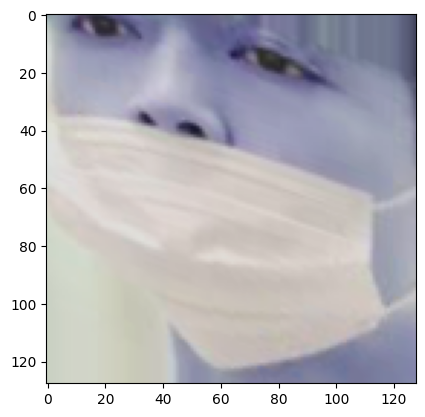

(128, 128, 3)
[[[143 159 164]
  [140 155 162]
  [143 156 167]
  ...
  [ 86  89 116]
  [ 78  81 106]
  [ 68  70  95]]

 [[156 171 175]
  [149 164 169]
  [148 162 170]
  ...
  [ 86  89 116]
  [ 78  81 106]
  [ 68  70  95]]

 [[168 184 185]
  [158 173 177]
  [153 167 174]
  ...
  [ 86  89 116]
  [ 78  81 106]
  [ 68  70  95]]

 ...

 [[201 209 194]
  [202 209 195]
  [203 209 196]
  ...
  [129 133 169]
  [130 132 170]
  [131 132 170]]

 [[201 209 194]
  [202 209 195]
  [203 209 196]
  ...
  [130 134 168]
  [131 134 169]
  [131 134 169]]

 [[201 209 194]
  [202 209 195]
  [203 209 196]
  ...
  [130 135 168]
  [131 136 168]
  [132 137 168]]]


In [ ]:
image1 = cv2.imread("/content/Dataset/mask_weared_incorrect/100.png")

plt.imshow(image1)
plt.show()

print(image1.shape)
print(image1)

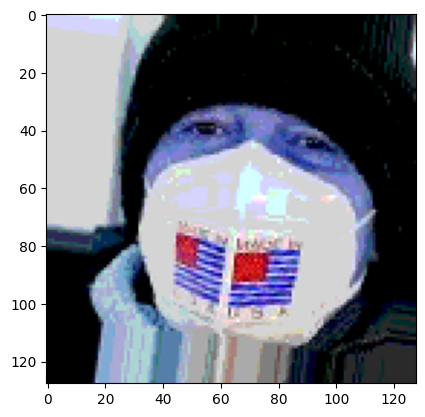

(128, 128, 3)
[[[212 212 255]
  [212 212 255]
  [212 212 255]
  ...
  [  0  40  42]
  [ 12  37  42]
  [ 71  70  70]]

 [[212 212 255]
  [212 212 255]
  [212 212 255]
  ...
  [  0   0  42]
  [ 38  38  42]
  [ 70  69  71]]

 [[212 212 255]
  [212 212 255]
  [212 212 255]
  ...
  [  0   1  42]
  [ 38  40  39]
  [ 68  86  88]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 42  42  42]
  [ 42  42  42]
  [ 42  42  42]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 42  42  42]
  [ 42  42  42]
  [ 42  42  42]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 42  42  42]
  [ 42  42  42]
  [ 42  42  42]]]


In [ ]:
image2 = cv2.imread("/content/Dataset/with_mask/100.png")

plt.imshow(image2)
plt.show()
print(image2.shape)
print(image2)

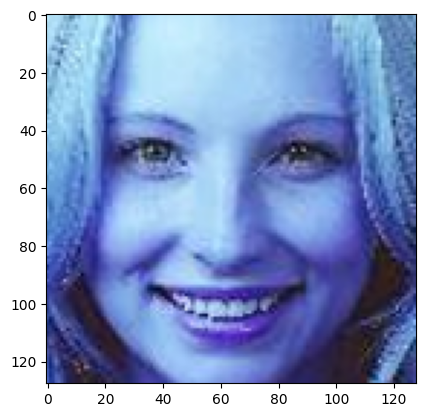

(128, 128, 3)
[[[185 231 249]
  [176 221 241]
  [183 230 250]
  ...
  [ 89 134 174]
  [ 99 144 184]
  [129 174 212]]

 [[193 238 255]
  [177 223 244]
  [173 220 243]
  ...
  [ 83 125 167]
  [ 80 123 165]
  [123 167 207]]

 [[187 232 252]
  [175 221 243]
  [173 220 243]
  ...
  [100 142 186]
  [ 94 135 179]
  [112 155 197]]

 ...

 [[ 73  99 189]
  [ 21  46 136]
  [ 42  65 152]
  ...
  [ 47  57 118]
  [ 53  58 132]
  [ 60  66 142]]

 [[ 79 106 196]
  [ 32  57 148]
  [ 45  67 156]
  ...
  [ 42  52 114]
  [ 53  59 133]
  [ 65  71 149]]

 [[ 81 108 198]
  [ 35  60 151]
  [ 40  61 150]
  ...
  [ 37  48 109]
  [ 41  46 120]
  [ 64  70 148]]]


In [ ]:
image3 = cv2.imread("/content/Dataset/without_mask/100.png")

plt.imshow(image3)
plt.show()

print(image3.shape)
print(image3)

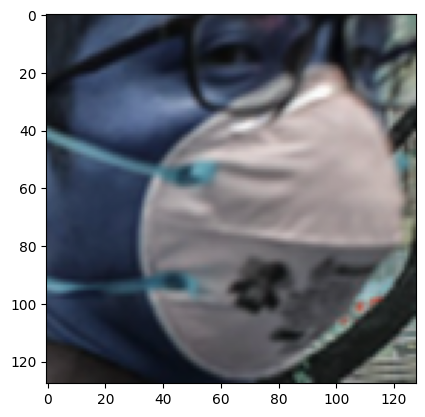

In [ ]:
test = cv2.imread("/content/Dataset/with_mask/1002.png")

plt.imshow(test)
plt.show()

 Note -  We have to convert image from BGR to RGB





In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

base_dir = '/content/Dataset'

train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (128,128),
    batch_size = 8,
    subset = 'training',
    class_mode ='categorical'
)

validation_gen = data_gen.flow_from_directory(
    base_dir,
    target_size = (128,128),
    batch_size = 8,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


Train_test_Split

Lets Implement Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D , Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , activation ='relu' , input_shape = (128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation ='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128 , (3,3) , activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128 , activation='relu'))
model.add(Dense(3 , activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer ='adam',
    loss = 'categorical_crossentropy',
    metrics =['accuracy']
)



In [ ]:
model.fit(
    train_gen ,
    epochs = 5 ,
    steps_per_epoch = train_gen.samples // 8,
    validation_data = validation_gen,
    validation_steps = validation_gen.samples // 8
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 260s 287ms/step - accuracy: 0.7931 - loss: 0.5080 - val_accuracy: 0.9196 - val_loss: 0.2161
Epoch 2/5
  1/898 ━━━━━━━━━━━━━━━━━━━━ 3:21 225ms/step - accuracy: 1.0000 - loss: 0.0307

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


898/898 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 1.0000 - loss: 0.0307 - val_accuracy: 0.9196 - val_loss: 0.2179
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 322s 308ms/step - accuracy: 0.9307 - loss: 0.1885 - val_accuracy: 0.9375 - val_loss: 0.1591
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 1.0000 - loss: 0.0339 - val_accuracy: 0.9302 - val_loss: 0.1697
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 322s 327ms/step - accuracy: 0.9656 - loss: 0.0966 - val_accuracy: 0.9459 - val_loss: 0.1376


In [ ]:
model.evaluate(validation_gen)

225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.9439 - loss: 0.1491


[0.1375497728586197, 0.9459308981895447]

In [ ]:
!pip install opencv-python playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=dd754ef6edeaeb0037fc0f7fbad19ddae534eb349d3503cf7dafd46f3eecef30
  Stored in directory: /root/.cache/pip/wheels/cf/42/ff/7c587bae55eec67b909ca316b250d9b4daedbf272a3cbeb907
Successfully built playsound


In [ ]:
model.save("mask_audio_model.h5")